In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from MagicCube import MagicCube


In [2]:
# Inisiasi Parameter 
T_initial = 1000  # Temperatur awal
cooling_rate = 0.99  # Laju pendinginan
max_iterations = 10000  # Iterasi maksimum


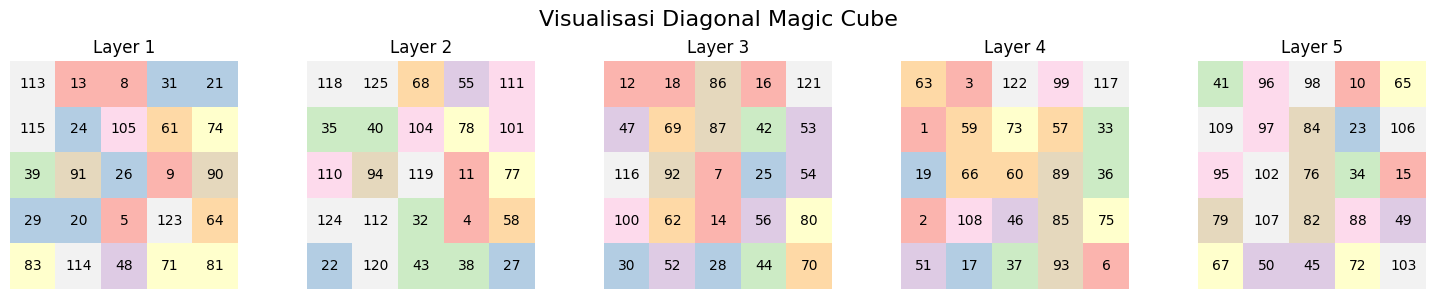

In [3]:
# Membuat Magic Cube dari Class MagicCube
n = 5
initial_cube = MagicCube(n)
initial_cube.visualize()  


In [4]:
def simulated_annealing(cube):
    T = T_initial
    current_cube = cube
    best_cube = cube
    objective_values = []
    exp_values = []

    for i in range(max_iterations):

        # Random suksesor, ambil dua posisi acak untuk pertukaran elemen
        pos1 = (random.randint(0, cube.n - 1), random.randint(0, cube.n - 1), random.randint(0, cube.n - 1))
        pos2 = (random.randint(0, cube.n - 1), random.randint(0, cube.n - 1), random.randint(0, cube.n - 1))
        
        # Hitung nilai objektif sebelum pertukaran
        current_objective = current_cube.objective_function()
        
        # Buat state baru dengan menukar dua elemen 
        current_cube.swap_elements(pos1, pos2)
        new_objective = current_cube.objective_function()
        delta_E = new_objective - current_objective
        exp_value = np.exp(-delta_E / T) if T > 0 else 0  # Hitung nilai e^(ΔE / T)
        exp_values.append(exp_value)  # Simpan nilai ini untuk plotting nanti
        

        # Tentukan apakah kondisi diterima berdasarkan delta_E dan temperatur
        if delta_E < 0 or np.exp(-delta_E / T) > np.random.rand():

            # Pertahankan state baru
            current_objective = new_objective

        else:
            
            # Kembalikan swap jika tidak diterima (reverse/kembalikan pada posisi semula)
            current_cube.swap_elements(pos1, pos2)

        # Update best state jika state sekarang lebih baik
        if current_objective < best_cube.objective_function():
            best_cube = current_cube

        # Simpan nilai objektif untuk plotting
        objective_values.append(current_objective)

        # Pendinginan
        T *= cooling_rate

        # Hentikan jika magic cube ditemukan
        if current_cube.is_valid_magic_cube():
            break

    return best_cube, objective_values, exp_values


In [5]:
results = []
for trial in range(3):
    print(f"Running trial {trial + 1}...")
    start_time = time.time()
    final_cube, objective_values, exp_values = simulated_annealing(MagicCube(n))
    end_time = time.time()
    duration = end_time - start_time

    results.append({
    "trial": trial + 1,
    "final_cube": final_cube,
    "objective_values": objective_values,
    "exp_values": exp_values,  # Simpan exp_values ke dalam results
    "duration": duration
})

    print(f"Trial {trial + 1} completed in {duration:.2f} seconds with final objective value: {final_cube.objective_function()}")


Running trial 1...


/var/folders/mm/qxk0j36n0xx3dqwlgzl5rfy40000gn/T/ipykernel_65719/2591627915.py:21: RuntimeWarning: overflow encountered in exp
  exp_value = np.exp(-delta_E / T) if T > 0 else 0  # Hitung nilai e^(ΔE / T)


Trial 1 completed in 6.60 seconds with final objective value: 5696
Running trial 2...
Trial 2 completed in 6.63 seconds with final objective value: 5681
Running trial 3...
Trial 3 completed in 6.34 seconds with final objective value: 5686


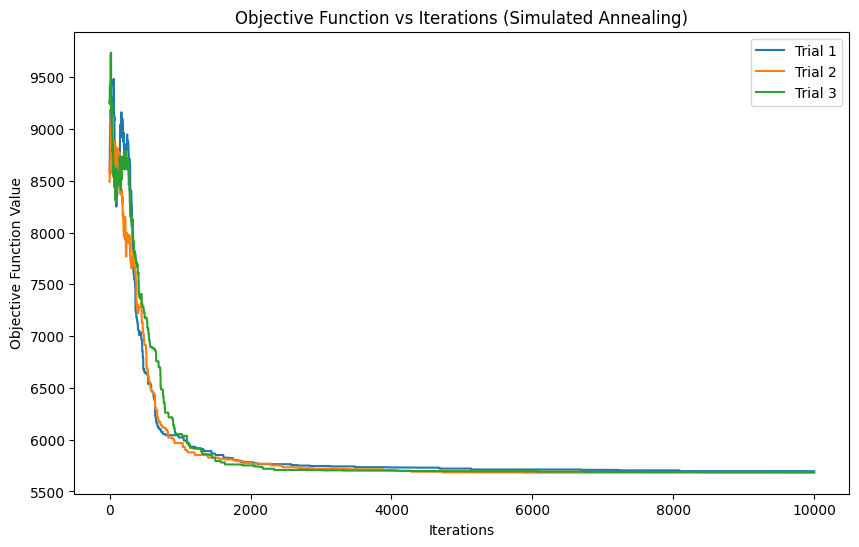

In [6]:
plt.figure(figsize=(10, 6))
for result in results:
    plt.plot(result["objective_values"], label=f"Trial {result['trial']}")
plt.xlabel("Iterations")
plt.ylabel("Objective Function Value")
plt.title("Objective Function vs Iterations (Simulated Annealing)")
plt.legend()
plt.show()


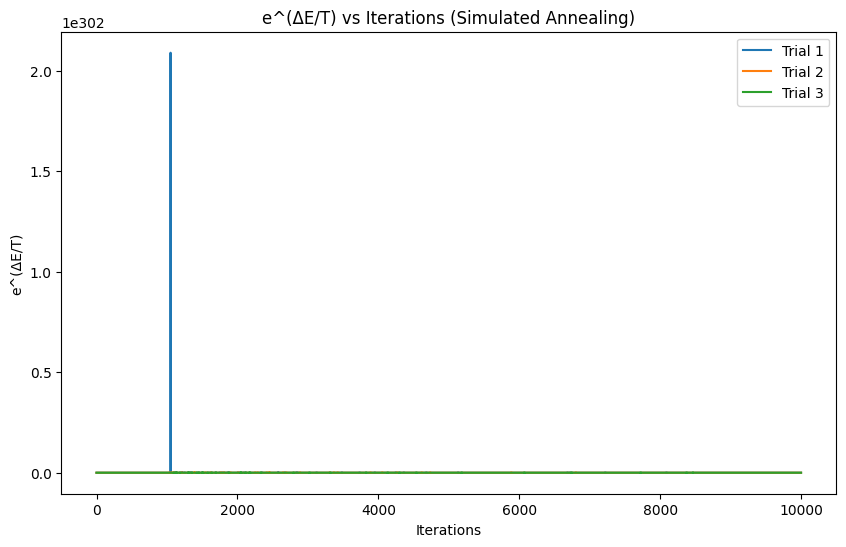

In [7]:
plt.figure(figsize=(10, 6))
for result in results:
    plt.plot(result["exp_values"], label=f"Trial {result['trial']}")
plt.xlabel("Iterations")
plt.ylabel("e^(ΔE/T)")
plt.title("e^(ΔE/T) vs Iterations (Simulated Annealing)")
plt.legend()
plt.show()


In [8]:
def calculate_stuck_frequency(objective_values, threshold=10):
    stuck_count = 0
    for i in range(1, len(objective_values)):
        if abs(objective_values[i] - objective_values[i - 1]) < threshold:
            stuck_count += 1
    return stuck_count

for result in results:
    stuck_frequency = calculate_stuck_frequency(result["objective_values"])
    print(f"Trial {result['trial']} stuck frequency: {stuck_frequency}")


Trial 1 stuck frequency: 9811
Trial 2 stuck frequency: 9802
Trial 3 stuck frequency: 9809


Final visualization for Trial 1:


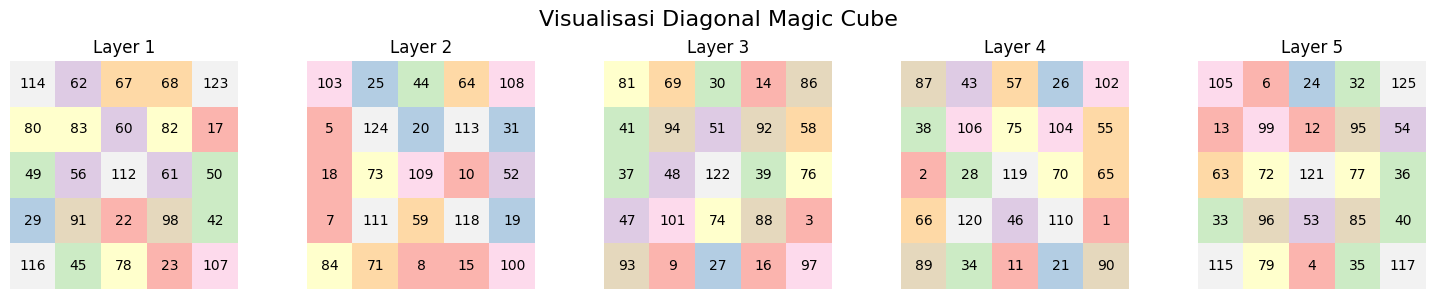

Final visualization for Trial 2:


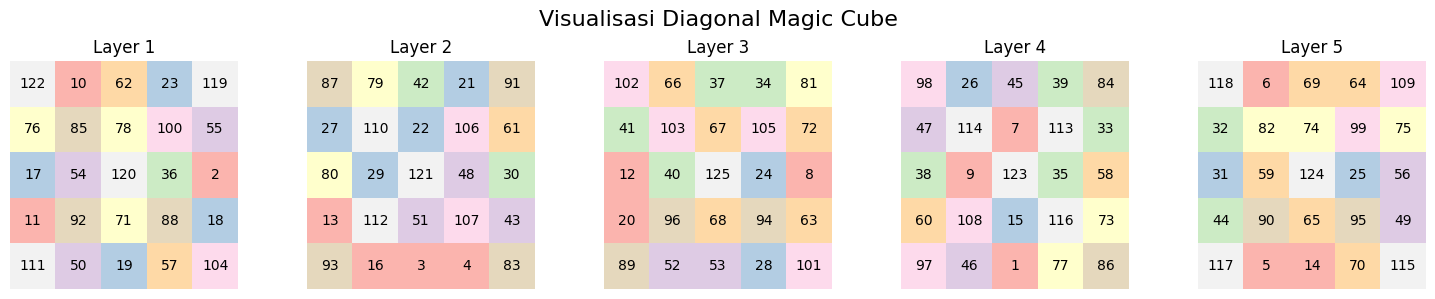

Final visualization for Trial 3:


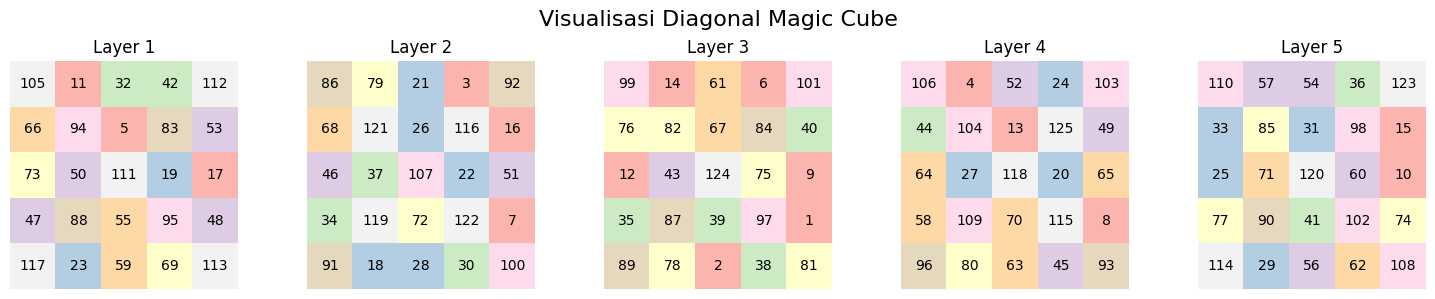

In [9]:
for result in results:
    print(f"Final visualization for Trial {result['trial']}:")
    result["final_cube"].visualize()
